In [3]:
# 0. 사용할 패키지 불러오고, 할당받은 GPU 에서 작업 시작
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.visible_device_list='2'
config.gpu_options.per_process_gpu_memory_fraction = 0.25
set_session(tf.Session(config=config))

import pandas as pd
from keras.models import Sequential 
from keras.layers import Dense 
import numpy as np 

#랜덤시드 고정
np.random.seed(100)


In [4]:
# 1. 데이터셋 생성하기 : 원본 데이터 불러오기
df = pd.read_csv('pima-indians-diabetes.csv')
df.head() 
len(df)
df['class'].unique()

array([1, 0])

In [5]:
# 1. 데이터셋 생성하기 : 학습데이터 구성
x_train = df.iloc[:700, 0:8]
y_train = df.iloc[:700, 8]
x_test = df.iloc[700:, 0:8]
y_test = df.iloc[700:, 8]

In [6]:
# 2. 모델 구성하기
model = Sequential() 
model.add(Dense(12, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# 2. 모델 구성하기
from keras.layers import Activation

model = Sequential() 
model.add(Dense(12, kernel_initializer='normal', input_shape=(8,)))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))          

In [8]:
# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
700/700 [==============================] - 1s 2ms/step - loss: 0.9953 - acc: 0.6429
Epoch 2/100
700/700 [==============================] - 0s 103us/step - loss: 0.7613 - acc: 0.4843
Epoch 3/100
700/700 [==============================] - 0s 116us/step - loss: 0.6952 - acc: 0.6400
Epoch 4/100
700/700 [==============================] - 0s 114us/step - loss: 0.6696 - acc: 0.6457
Epoch 5/100
700/700 [==============================] - 0s 93us/step - loss: 0.6514 - acc: 0.6529
Epoch 6/100
700/700 [==============================] - 0s 97us/step - loss: 0.6400 - acc: 0.6486
Epoch 7/100
700/700 [==============================] - 0s 101us/step - loss: 0.6386 - acc: 0.6657
Epoch 8/100
700/700 [==============================] - 0s 95us/step - loss: 0.6268 - acc: 0.6614
Epoch 9/100
700/700 [==============================] - 0s 101us/step - loss: 0.6211 - acc: 0.6614
Epoch 10/100
700/700 [==============================] - 0s 112us/step - loss: 0.6166 - acc: 0.6629
Epoch 11/100
700/700 [==

700/700 [==============================] - 0s 103us/step - loss: 0.5367 - acc: 0.7414
Epoch 85/100
700/700 [==============================] - 0s 104us/step - loss: 0.5328 - acc: 0.7457
Epoch 86/100
700/700 [==============================] - 0s 95us/step - loss: 0.5376 - acc: 0.7443
Epoch 87/100
700/700 [==============================] - 0s 94us/step - loss: 0.5364 - acc: 0.7300
Epoch 88/100
700/700 [==============================] - 0s 85us/step - loss: 0.5354 - acc: 0.7257
Epoch 89/100
700/700 [==============================] - 0s 86us/step - loss: 0.5276 - acc: 0.7500
Epoch 90/100
700/700 [==============================] - 0s 91us/step - loss: 0.5299 - acc: 0.7486
Epoch 91/100
700/700 [==============================] - 0s 101us/step - loss: 0.5344 - acc: 0.7429
Epoch 92/100
700/700 [==============================] - 0s 96us/step - loss: 0.5311 - acc: 0.7357
Epoch 93/100
700/700 [==============================] - 0s 101us/step - loss: 0.5301 - acc: 0.7414
Epoch 94/100
700/700 [=======

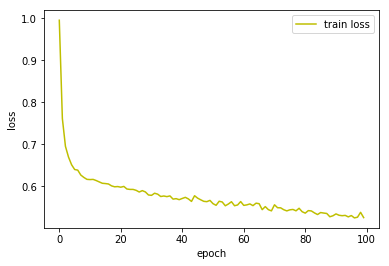

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots() 
#acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
#loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

#acc_ax.plot(hist.history['acc'], 'b', label='train acc')
#acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
#acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper right')
#acc_ax.legend(loc='lower left')

plt.show()


In [12]:
# 5. 모델 평가하기
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

68/68 [==============================] - 0s 1ms/step
acc: 70.59%


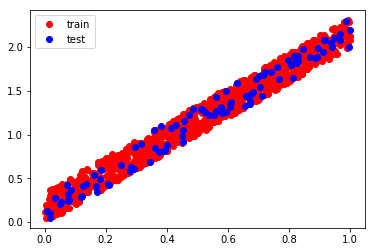

In [13]:
import numpy as np

# 데이터셋 생성
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
x_test.reshape(100,)


array([0.04884141, 0.29295324, 0.60674675, 0.67353549, 0.53859668,
       0.36273868, 0.52449374, 0.56215551, 0.4534235 , 0.42935497,
       0.58087791, 0.3909288 , 0.83061282, 0.59375009, 0.16665725,
       0.93787532, 0.01847698, 0.67853399, 0.81819025, 0.99924514,
       0.29467054, 0.94008611, 0.01655984, 0.24833351, 0.89054002,
       0.80642922, 0.17072452, 0.20717389, 0.82532213, 0.41304548,
       0.81260765, 0.39414577, 0.61064874, 0.3586319 , 0.27839327,
       0.07754243, 0.13530052, 0.68062785, 0.79728661, 0.45171067,
       0.00886304, 0.59286061, 0.07612643, 0.7408862 , 0.18094401,
       0.91147786, 0.94605859, 0.60742046, 0.37404774, 0.96574905,
       0.62925026, 0.56187802, 0.82904924, 0.18401821, 0.38093388,
       0.9674414 , 0.03502145, 0.67121531, 0.81773604, 0.45460215,
       0.71163665, 0.70378435, 0.12010933, 0.7158914 , 0.07180939,
       0.28399601, 0.12247735, 0.82773749, 0.20954675, 0.76158008,
       0.84608455, 0.91745493, 0.72091361, 0.12557017, 0.91547

In [16]:
# 0. 사용할 패키지 불러오기
import numpy as np
from sklearn.metrics import mean_squared_error
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

x_train = x_train.reshape(1000,)
y_train = y_train.reshape(1000,)
x_test = x_test.reshape(100,)
y_test = y_test.reshape(100,)

# 2. 모델 구성하기
w = np.cov(x_train, y_train, bias=1)[0,1] / np.var(x_train)
b = np.average(y_train) - w * np.average(x_train)

print (w, b)

# 3. 모델 평가하기
from sklearn.metrics import mean_squared_error
y_predict = w * x_test + b
mse = mean_squared_error(y_test, y_predict)
print('mse : ' + str(mse))

1.999559195815165 0.16856227806494561
mse : 0.008996213172660882


Epoch 1/50
1000/1000 [==============================] - 0s 237us/step - loss: 0.9934
Epoch 2/50
1000/1000 [==============================] - 0s 56us/step - loss: 0.9398
Epoch 3/50
1000/1000 [==============================] - 0s 50us/step - loss: 0.8944
Epoch 4/50
1000/1000 [==============================] - 0s 51us/step - loss: 0.8510
Epoch 5/50
1000/1000 [==============================] - 0s 47us/step - loss: 0.8092
Epoch 6/50
1000/1000 [==============================] - 0s 52us/step - loss: 0.7685
Epoch 7/50
1000/1000 [==============================] - 0s 54us/step - loss: 0.7290
Epoch 8/50
1000/1000 [==============================] - 0s 56us/step - loss: 0.6908
Epoch 9/50
1000/1000 [==============================] - 0s 55us/step - loss: 0.6538
Epoch 10/50
1000/1000 [==============================] - 0s 54us/step - loss: 0.6178
Epoch 11/50
1000/1000 [==============================] - 0s 53us/step - loss: 0.5831
Epoch 12/50
1000/1000 [==============================] - 0s 54us/step - l

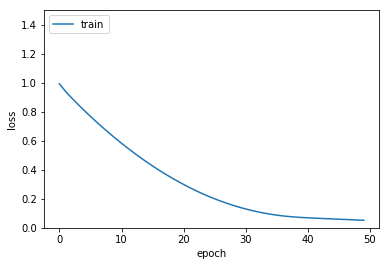

100/100 [==============================] - 0s 559us/step
loss : 0.04558271244168281


In [17]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(1, input_dim=1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)
w, b = model.get_weights()
print (w, b)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

Epoch 1/50
1000/1000 [==============================] - 0s 245us/step - loss: 1.6329
Epoch 2/50
1000/1000 [==============================] - 0s 33us/step - loss: 1.2747
Epoch 3/50
1000/1000 [==============================] - 0s 32us/step - loss: 1.0003
Epoch 4/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.7627
Epoch 5/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.5576
Epoch 6/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.3857
Epoch 7/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.2490
Epoch 8/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.1546
Epoch 9/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.0993
Epoch 10/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.0763
Epoch 11/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.0646
Epoch 12/50
1000/1000 [==============================] - 0s 34us/step - l

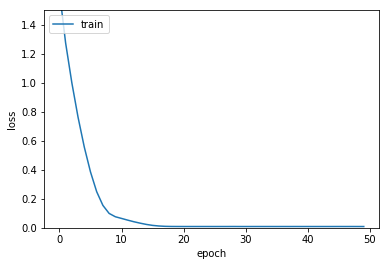

100/100 [==============================] - 0s 650us/step
loss : 0.009978837519884109


In [22]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

Epoch 1/50
1000/1000 [==============================] - 0s 417us/step - loss: 0.9084
Epoch 2/50
1000/1000 [==============================] - 0s 40us/step - loss: 0.2136
Epoch 3/50
1000/1000 [==============================] - 0s 42us/step - loss: 0.0478
Epoch 4/50
1000/1000 [==============================] - 0s 43us/step - loss: 0.0301
Epoch 5/50
1000/1000 [==============================] - 0s 44us/step - loss: 0.0177
Epoch 6/50
1000/1000 [==============================] - 0s 42us/step - loss: 0.0111
Epoch 7/50
1000/1000 [==============================] - 0s 43us/step - loss: 0.0099
Epoch 8/50
1000/1000 [==============================] - 0s 40us/step - loss: 0.0099
Epoch 9/50
1000/1000 [==============================] - 0s 44us/step - loss: 0.0099
Epoch 10/50
1000/1000 [==============================] - 0s 42us/step - loss: 0.0098
Epoch 11/50
1000/1000 [==============================] - 0s 43us/step - loss: 0.0097
Epoch 12/50
1000/1000 [==============================] - 0s 42us/step - l

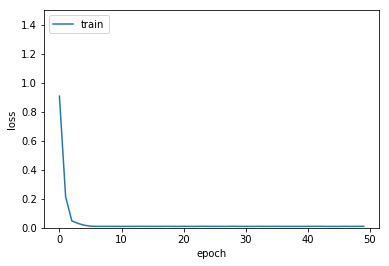

100/100 [==============================] - 0s 736us/step
loss : 0.008717193247866817


In [23]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))